In [ ]:
import pandas as pd

# Load the datasets
file_paths = ['/content/mHealth_subject1.log', '/content/mHealth_subject3.log', '/content/mHealth_subject8.log','/content/mHealth_subject2.log','/content/mHealth_subject6.log']
column_names = [
    'Acc16_1', 'Acc16_2', 'Acc16_3', 'ECG_1', 'ECG_2', 'AccChest_1', 'AccChest_2', 'AccChest_3',
    'AccAnkle_1', 'AccAnkle_2', 'AccAnkle_3', 'GyroAnkle_1', 'GyroAnkle_2', 'GyroAnkle_3',
    'MagAnkle_1', 'MagAnkle_2', 'MagAnkle_3', 'AccArm_1', 'AccArm_2', 'AccArm_3',
    'GyroArm_1', 'GyroArm_2', 'GyroArm_3', 'Activity'
]

# Combine data from all files
data_list = []
for file_path in file_paths:
    data_list.append(pd.read_csv(file_path, sep='\t', header=None, names=column_names))
data = pd.concat(data_list, axis=0)

In [ ]:
data.head()

,Acc16_1,Acc16_2,Acc16_3,ECG_1,ECG_2,AccChest_1,AccChest_2,AccChest_3,AccAnkle_1,AccAnkle_2,...,MagAnkle_1,MagAnkle_2,MagAnkle_3,AccArm_1,AccArm_2,AccArm_3,GyroArm_1,GyroArm_2,GyroArm_3,Activity
0,-9.8184,0.009971,0.29563,0.004186,0.004186,2.1849,-9.6967,0.63077,0.103900,-0.84053,...,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,-2.35000,-1.610200,-0.030899,0
1,-9.8489,0.524040,0.37348,0.004186,0.016745,2.3876,-9.5080,0.68389,0.085343,-0.83865,...,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,-2.16320,-0.882540,0.326570,0
2,-9.6602,0.181850,0.43742,0.016745,0.037677,2.4086,-9.5674,0.68113,0.085343,-0.83865,...,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,-1.61750,-0.165620,-0.030693,0
3,-9.6507,0.214220,0.24033,0.079540,0.117220,2.1814,-9.4301,0.55031,0.085343,-0.83865,...,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,-1.07710,0.006945,-0.382620,0
4,-9.7030,0.303890,0.31156,0.221870,0.205130,2.4173,-9.3889,0.71098,0.085343,-0.83865,...,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,-0.53684,0.175900,-1.095500,0


In [ ]:
data.count()

,0
Acc16_1,641281
Acc16_2,641281
Acc16_3,641281
ECG_1,641281
ECG_2,641281
AccChest_1,641281
AccChest_2,641281
AccChest_3,641281
AccAnkle_1,641281
AccAnkle_2,641281


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Filter data for selected activities
data = data[data['Activity'].isin([1, 3, 8])]

# Adjust the labels to be 0-indexed
label_mapping = {1: 0, 3: 1, 8: 2}
data['Activity'] = data['Activity'].map(label_mapping)

# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# List of sensor columns to normalize (excluding the 'Activity' column)
sensor_columns = data.columns[:-1]

# Normalize the sensor data
data[sensor_columns] = scaler.fit_transform(data[sensor_columns])

# Display the first few rows of the normalized data
data.head()


<ipython-input-52-642390beb6ca>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Activity'] = data['Activity'].map(label_mapping)
<ipython-input-52-642390beb6ca>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[sensor_columns] = scaler.fit_transform(data[sensor_columns])


,Acc16_1,Acc16_2,Acc16_3,ECG_1,ECG_2,AccChest_1,AccChest_2,AccChest_3,AccAnkle_1,AccAnkle_2,...,MagAnkle_1,MagAnkle_2,MagAnkle_3,AccArm_1,AccArm_2,AccArm_3,GyroArm_1,GyroArm_2,GyroArm_3,Activity
6656,0.428323,0.351953,0.623446,0.518267,0.691503,0.447139,0.460155,0.668788,0.302241,0.060589,...,0.362703,0.357468,0.530480,0.619587,0.089779,0.297754,0.535011,0.522008,0.486342,0
6657,0.428551,0.336100,0.605121,0.515124,0.692177,0.435128,0.456458,0.669675,0.302241,0.060589,...,0.357663,0.352210,0.518678,0.619587,0.089779,0.297754,0.537408,0.523523,0.488325,0
6658,0.424910,0.326797,0.607848,0.519839,0.695548,0.433627,0.453248,0.672505,0.308146,0.070692,...,0.361331,0.352589,0.519934,0.619587,0.089779,0.297754,0.535011,0.522008,0.486342,0
6659,0.429898,0.330269,0.611367,0.534377,0.704651,0.433077,0.453220,0.670649,0.308146,0.070692,...,0.359987,0.353321,0.519563,0.606864,0.089779,0.299888,0.535023,0.522510,0.486337,0
6660,0.428185,0.332541,0.611920,0.526126,0.697908,0.430408,0.455989,0.669625,0.308146,0.070692,...,0.360937,0.352243,0.522383,0.606864,0.089779,0.299888,0.532662,0.522509,0.485329,0


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = data[sensor_columns]
y = data['Activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Model Evaluation Function
def evaluate_model(model, X_test, y_test, y_pred, model_name):
    acc = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy:", acc)
    print(f"Classification Report {model_name}:\n", classification_report(y_test, y_pred))
    plot_confusion_matrix(y_test, y_pred, f'{model_name} Confusion Matrix')
    return acc

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC Curve and AUC
def plot_roc_curve(y_test, y_score, model_name):
    fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=2)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
import numpy as np

# Function to plot feature importance for Random Forest
def plot_feature_importance(model, feature_names):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importance")
    plt.bar(range(X.shape[1]), importance[indices], align="center")
    plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [ ]:
print("y_test shape:", y_test.shape)
print("y_test head:", y_test.head())

y_test shape: (9114,)
y_test head: 62299    2
4752     0
3850     0
13849    1
11343    0
Name: Activity, dtype: int64


Logistic Regression Accuracy: 0.9800307219662059
Classification Report Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      3063
           1       1.00      1.00      1.00      3125
           2       1.00      0.94      0.97      2926

    accuracy                           0.98      9114
   macro avg       0.98      0.98      0.98      9114
weighted avg       0.98      0.98      0.98      9114



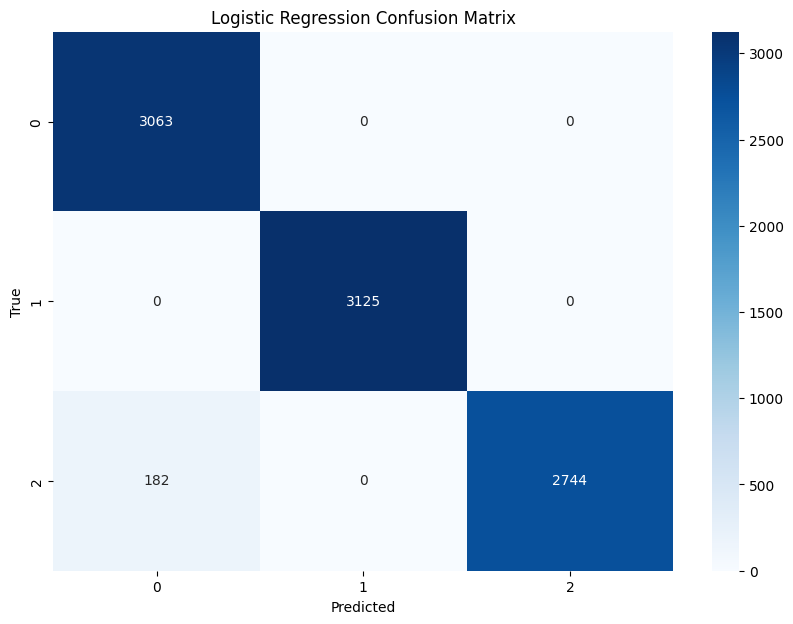

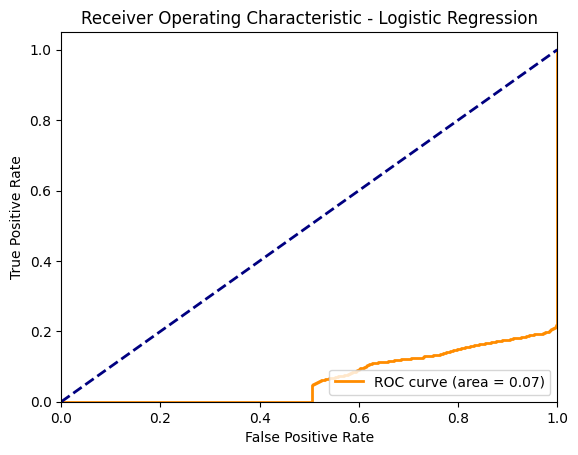

In [ ]:
# Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
y_score_lr = lr_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_lr = evaluate_model(lr_model, X_test, y_test, y_pred_lr, "Logistic Regression")
plot_roc_curve(y_test, y_score_lr, "Logistic Regression")

Random Forest Accuracy: 1.0
Classification Report Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114



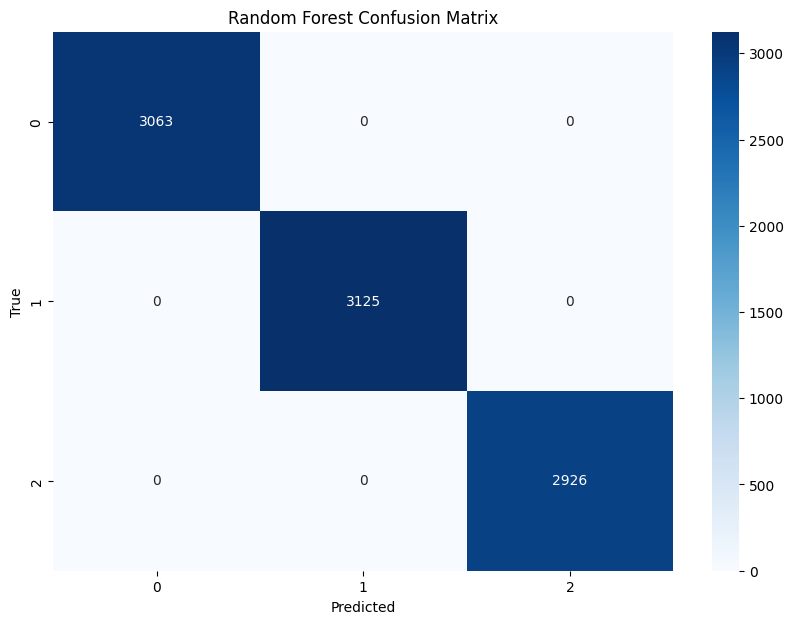

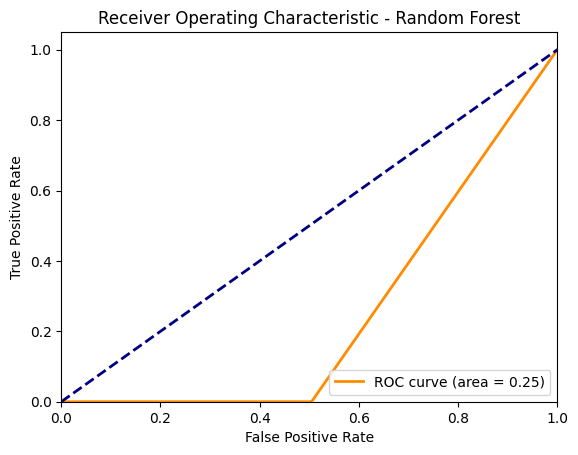

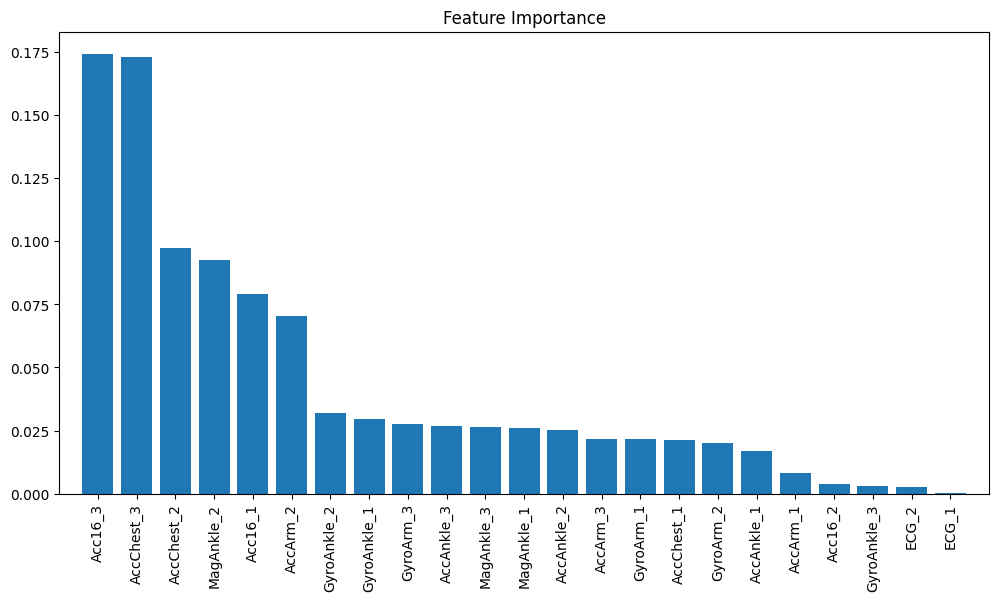

In [ ]:
# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_score_rf = rf_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_rf = evaluate_model(rf_model, X_test, y_test, y_pred_rf, "Random Forest")
plot_roc_curve(y_test, y_score_rf, "Random Forest")
plot_feature_importance(rf_model, X.columns)

SVM Accuracy: 0.999890278692122
Classification Report SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114



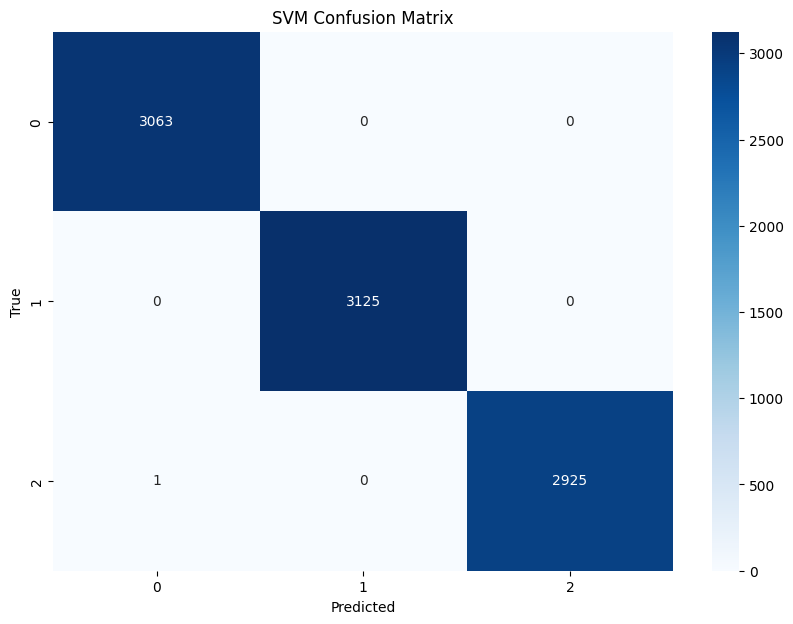

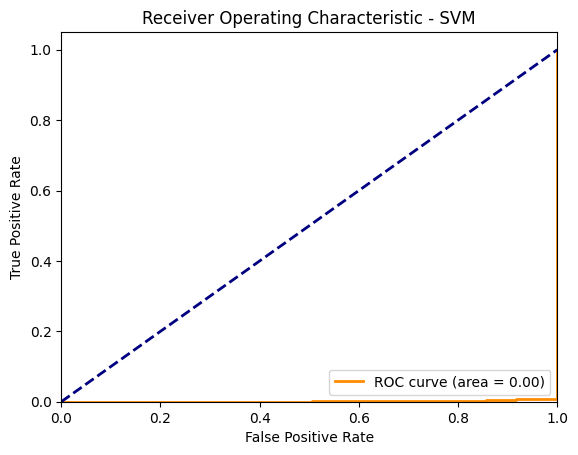

In [ ]:
# SVM model
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
y_score_svm = svm_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_svm = evaluate_model(svm_model, X_test, y_test, y_pred_svm, "SVM")
plot_roc_curve(y_test, y_score_svm, "SVM")

Neural Network Accuracy: 0.999890278692122
Classification Report Neural Network:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114



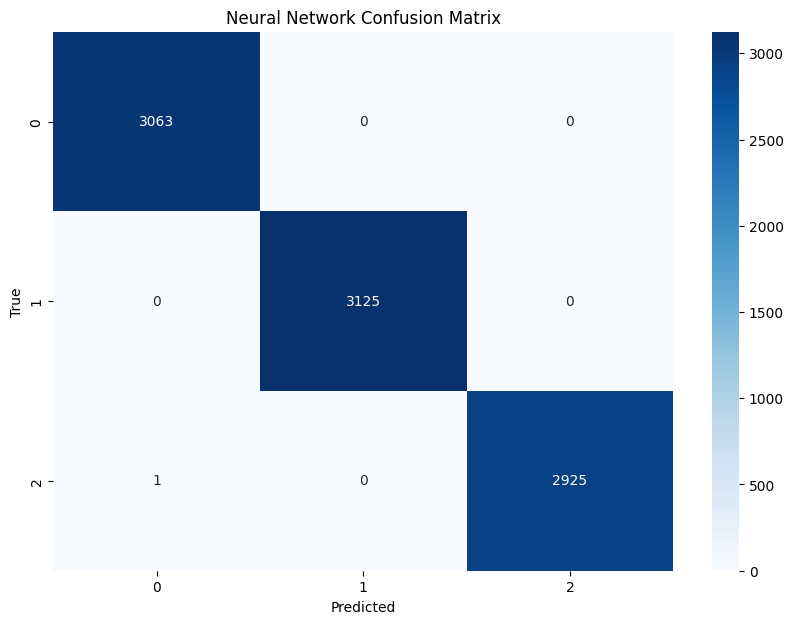

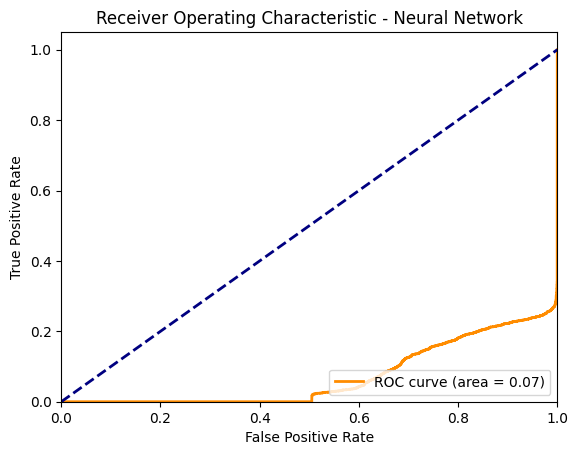

In [ ]:
# Neural Network model
nn_model = MLPClassifier(max_iter=1000)
nn_model.fit(X_train, y_train)
y_pred_nn = nn_model.predict(X_test)
y_score_nn = nn_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_nn = evaluate_model(nn_model, X_test, y_test, y_pred_nn, "Neural Network")
plot_roc_curve(y_test, y_score_nn, "Neural Network")

XGBoost Accuracy: 1.0
Classification Report XGBoost:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114



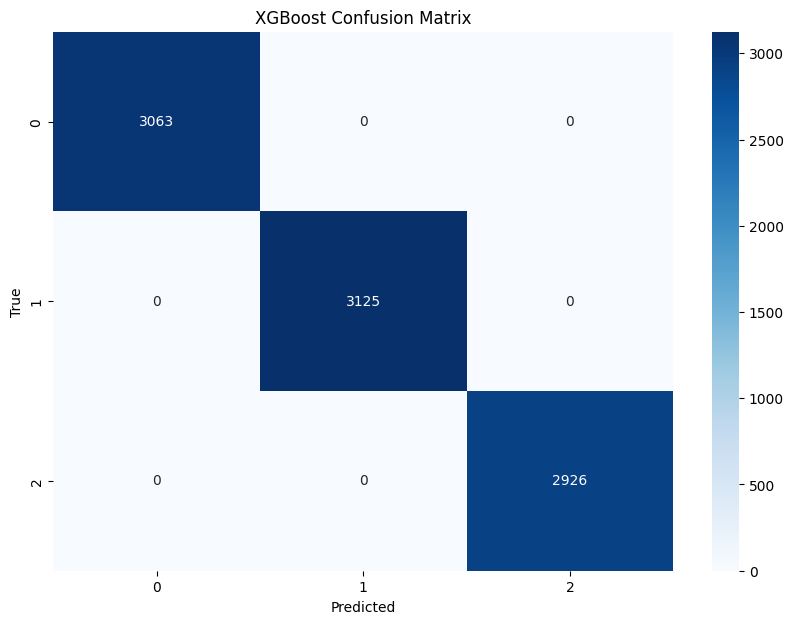

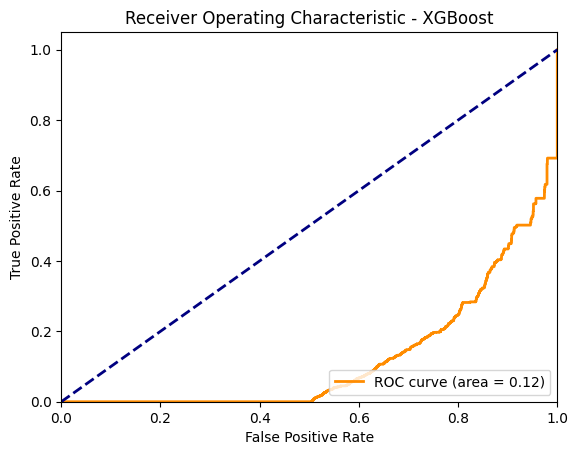

In [ ]:
# XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_score_xgb = xgb_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_xgb = evaluate_model(xgb_model, X_test, y_test, y_pred_xgb, "XGBoost")
plot_roc_curve(y_test, y_score_xgb, "XGBoost")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5852
[LightGBM] [Info] Number of data points in the train set: 36454, number of used features: 23
[LightGBM] [Info] Start training from score -1.086696
[LightGBM] [Info] Start training from score -1.091750
[LightGBM] [Info] Start training from score -1.117666
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM Accuracy: 1.0
Classification Report LightGBM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg     

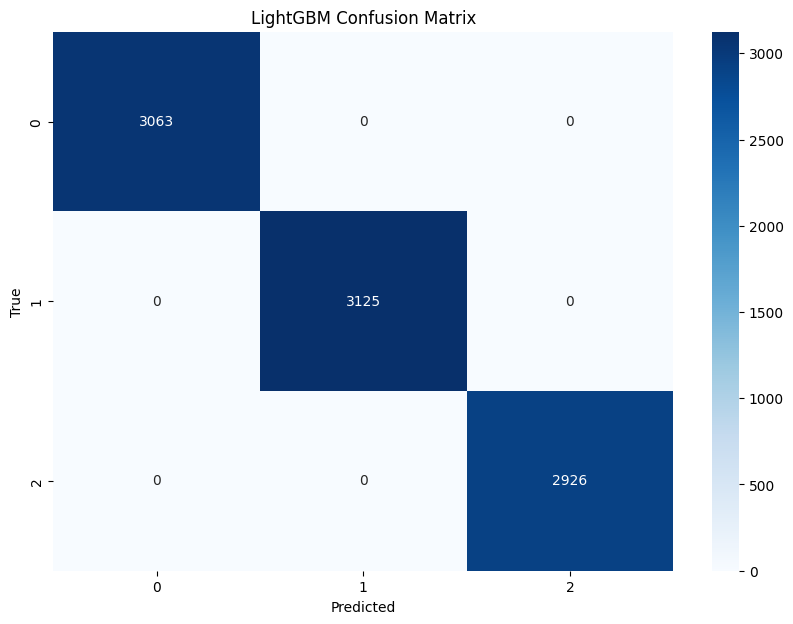

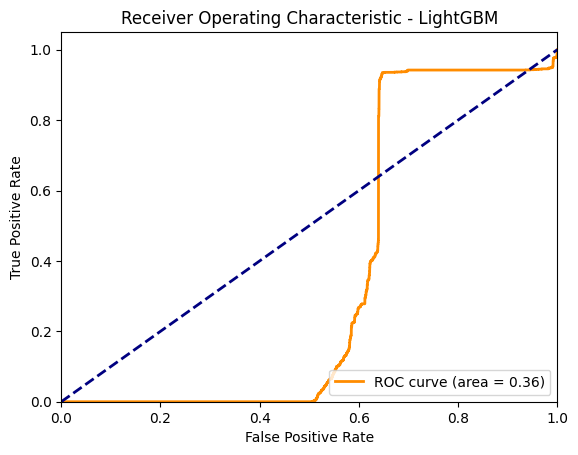

In [ ]:
# LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)
y_score_lgb = lgb_model.predict_proba(X_test)[:, 1]  # Use predict_proba for probability scores
acc_lgb = evaluate_model(lgb_model, X_test, y_test, y_pred_lgb, "LightGBM")
plot_roc_curve(y_test, y_score_lgb, "LightGBM")

In [ ]:
# Deep Learning model
num_classes = len(y.unique())
dl_model = Sequential()
dl_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(64, activation='relu'))
dl_model.add(Dropout(0.5))
dl_model.add(Dense(32, activation='relu'))
dl_model.add(Dense(num_classes, activation='softmax'))

dl_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Convert labels to categorical (one-hot encoding)
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Train Deep Learning model
dl_model.fit(X_train, y_train_cat, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.7727 - loss: 0.4790 - val_accuracy: 0.9874 - val_loss: 0.0446
Epoch 2/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9776 - loss: 0.0670 - val_accuracy: 0.9984 - val_loss: 0.0097
Epoch 3/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0429 - val_accuracy: 0.9999 - val_loss: 0.0052
Epoch 4/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9886 - loss: 0.0360 - val_accuracy: 0.9999 - val_loss: 0.0055
Epoch 5/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9908 - loss: 0.0325 - val_accuracy: 0.9999 - val_loss: 0.0066
Epoch 6/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9902 - loss: 0.0340 - val_accuracy: 0.9996 - val_loss: 0.0036
Epoch 7/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9943 - loss: 0.0217 - val_accuracy: 0.9996 - val_loss: 0.0038
Epoch 8/20
912/912 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9929 - loss: 0.0278 - val_accuracy: 0

In [ ]:
# Predict with Deep Learning model
y_pred_dl_probs = dl_model.predict(X_test)
y_pred_dl = np.argmax(y_pred_dl_probs, axis=1)
y_score_dl = y_pred_dl_probs[:, 2]  # Probability for the positive class (class 2)

285/285 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Deep Learning Accuracy: 0.999122229536976
Classification Report Deep Learning:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3063
           1       1.00      1.00      1.00      3125
           2       1.00      1.00      1.00      2926

    accuracy                           1.00      9114
   macro avg       1.00      1.00      1.00      9114
weighted avg       1.00      1.00      1.00      9114



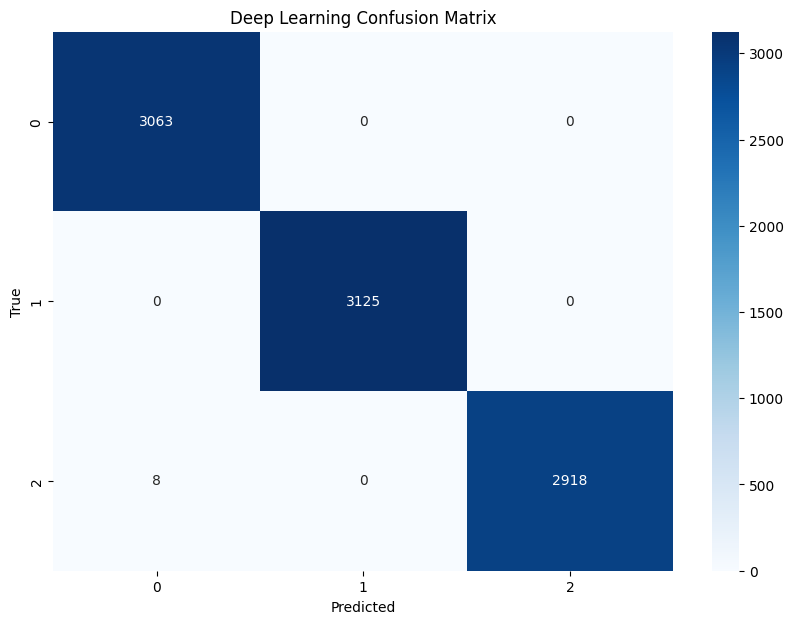

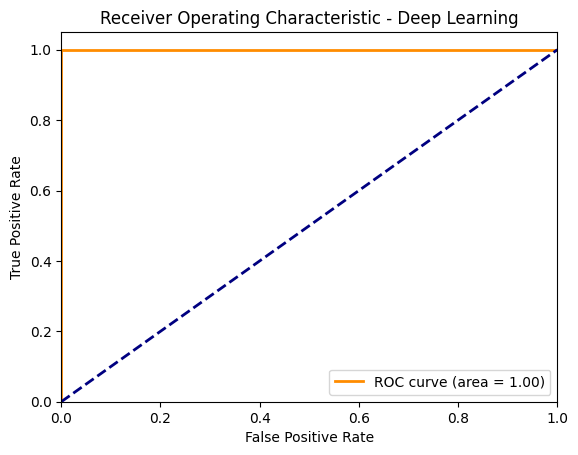

In [ ]:
acc_dl = accuracy_score(y_test, y_pred_dl)
print(f"Deep Learning Accuracy: {acc_dl}")
print(f"Classification Report Deep Learning:\n", classification_report(y_test, y_pred_dl))
plot_confusion_matrix(y_test, y_pred_dl, 'Deep Learning Confusion Matrix')
plot_roc_curve(y_test, y_score_dl, "Deep Learning")

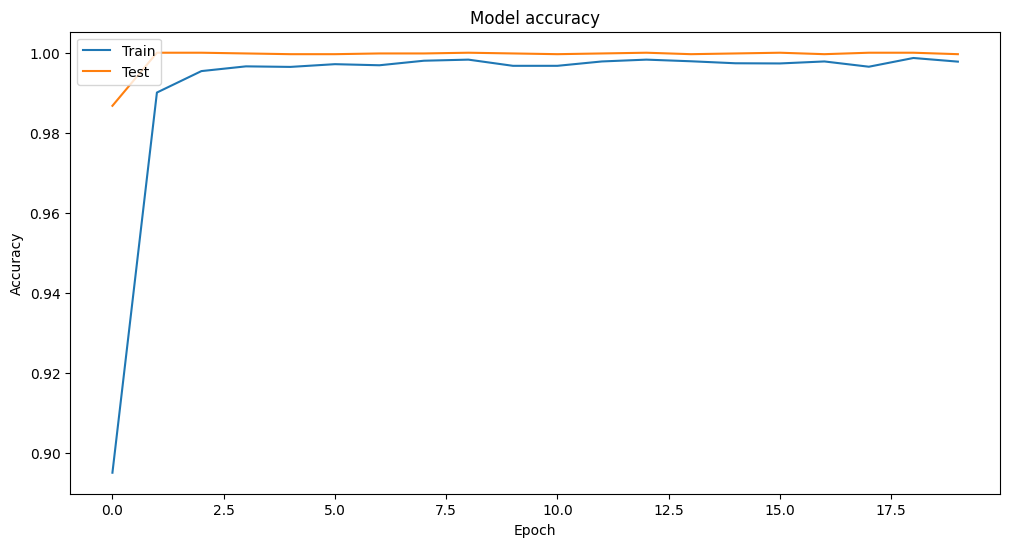

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

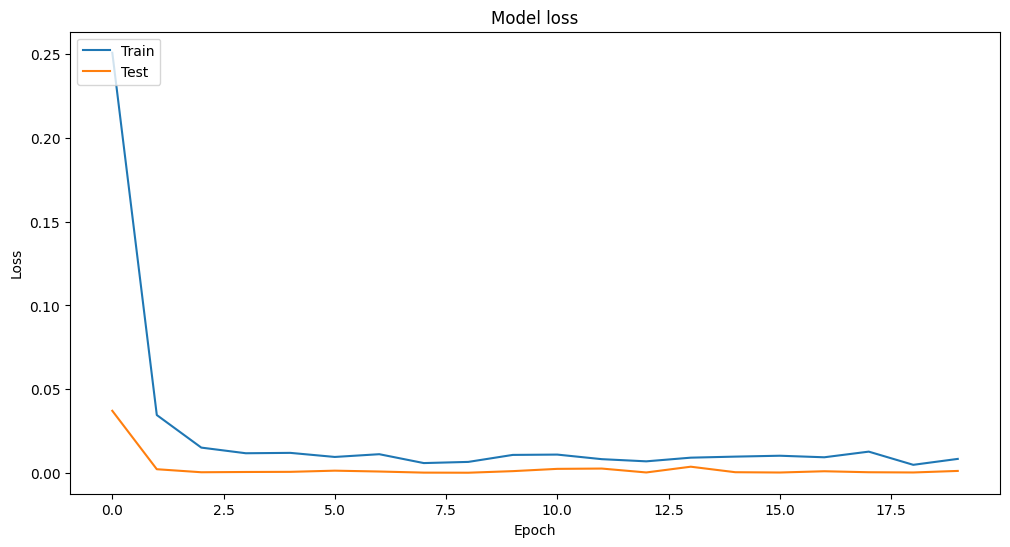

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

<ipython-input-2-01df7da09ce2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=models, y=accuracies, palette='viridis')


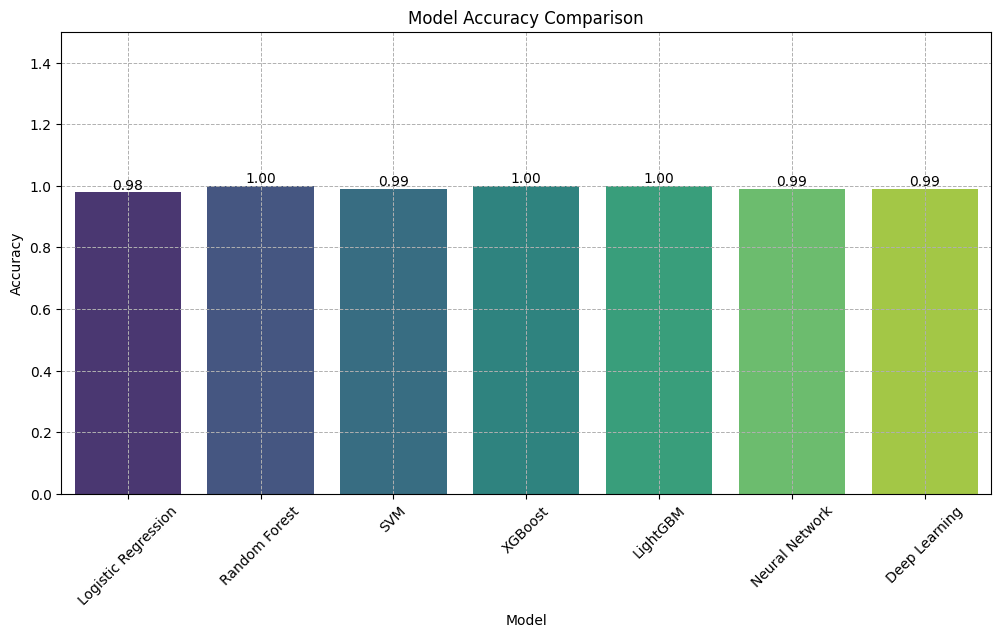

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Accuracy Comparison
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'LightGBM', 'Neural Network', 'Deep Learning']
accuracies = [0.98, 1.0, 0.99, 1.0, 1.0, 0.99, 0.99]

if len(models) == len(accuracies):
    plt.figure(figsize=(12, 6))
    barplot = sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1.5)
    plt.xticks(rotation=45)

    # Add grid lines
    plt.grid(True, which='both', linestyle='--', linewidth=0.7)

    # Display accuracy values on top of each bar
    for p in barplot.patches:
        barplot.annotate(f'{p.get_height():.2f}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center',
                         xytext=(0, 5),
                         textcoords='offset points')

    plt.show()
else:
    print("Error: The lengths of models and accuracies lists do not match.")